In [1]:
import os
import sys
import pandas as pd

In [ ]:
partition = input("Inserisci la partizione che vuoi utilizzare")
print("Hai inserito la partizione: ", partition)
partition = os.path.join("../partitioning/npy", partition)

foldername = input("Inserisci il nome della cartella dove salvare i risultati")
print("Hai inserito la cartella: ", foldername)

In [ ]:
import tensorflow as tf
print("GPU disponibile:", tf.config.list_physical_devices('GPU'))

2025-03-08 21:40:05.842743: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-03-08 21:40:05.842761: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


GPU disponibile: []


2025-03-08 21:40:06.695627: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-03-08 21:40:06.698244: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-03-08 21:40:06.698277: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2025-03-08 21:40:06.698301: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2025-03-08 21:40:06.698323: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [ ]:
sys.path.append("../preprocessing")

In [ ]:
import sampling as samp
import normalizzation as norm

In [ ]:
sys.path.append("../models")

In [ ]:
from lstm_model import LSTMModel

In [ ]:
def load_partitions(root_path):
    file_names = ["X_train.csv", "X_test.csv", "X_val.csv", "y_train.csv", "y_test.csv", "y_val.csv"]
    datasets = [pd.read_csv(os.path.join(root_path, file)).values for file in file_names]
    return tuple(datasets)

In [ ]:
# load data
X_train, X_test, X_val, y_train, y_test, y_val = load_partitions(partition)

# show partitions dimention
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")

X_train shape: (17919, 20), y_train shape: (17919, 1)
X_test shape: (3840, 20), y_test shape: (3840, 1)
X_val shape: (3839, 20), y_val shape: (3839, 1)


In [ ]:
# Esempio di input_shape per dati sequenziali: (timesteps=100, features=10)
# input_shape = (50, 1)
window_lag = X_train.shape[1]
input_shape = (window_lag, 1)
print("input_shape: ", input_shape)

# initialize model
lstm_model = LSTMModel(input_shape, foldername)

# show model structure
lstm_model.summary()

input_shape:  (20, 1)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 20, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


2025-03-08 21:40:07.253037: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
# training model
lstm_model.train(X_train, y_train, epochs=100, batch_size=32, validation_data = (X_val, y_val))

Epoch 1/100
559/560 [============================>.] - ETA: 0s - loss: 0.0099 - mae: 0.0752 - root_mean_squared_error: 0.0972
Epoch 1: val_loss improved from inf to 0.00726, saving model to lstm_test_5/best_model.h5
560/560 [==============================] - 8s 12ms/step - loss: 0.0099 - mae: 0.0752 - root_mean_squared_error: 0.0972 - val_loss: 0.0073 - val_mae: 0.0647 - val_root_mean_squared_error: 0.0842
Epoch 2/100
559/560 [============================>.] - ETA: 0s - loss: 0.0077 - mae: 0.0670 - root_mean_squared_error: 0.0865
Epoch 2: val_loss improved from 0.00726 to 0.00710, saving model to lstm_test_5/best_model.h5
560/560 [==============================] - 7s 13ms/step - loss: 0.0076 - mae: 0.0669 - root_mean_squared_error: 0.0864 - val_loss: 0.0071 - val_mae: 0.0637 - val_root_mean_squared_error: 0.0832
Epoch 3/100
559/560 [============================>.] - ETA: 0s - loss: 0.0076 - mae: 0.0667 - root_mean_squared_error: 0.0863
Epoch 3: val_loss did not improve from 0.00710
560

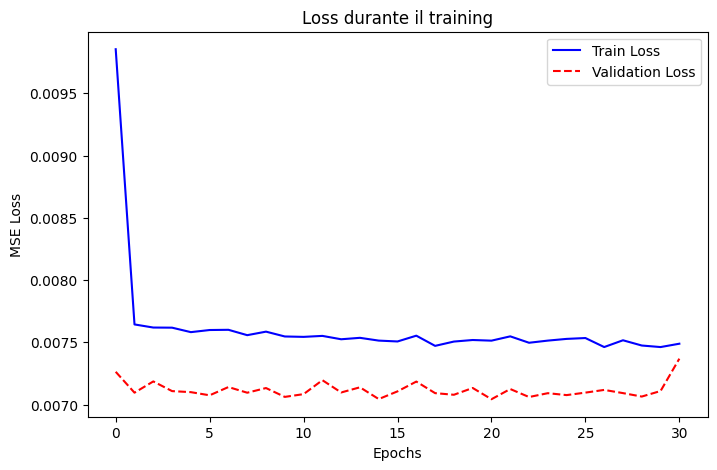

Grafico Loss salvato in lstm_test_5/loss_plot.png


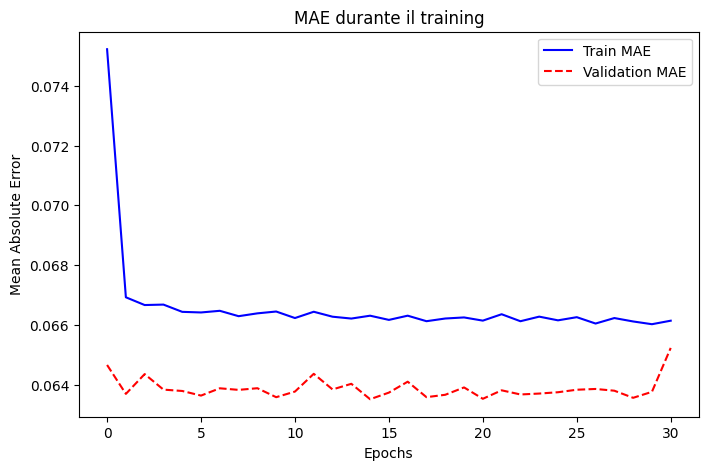

Grafico MAE salvato in lstm_test_5/mae_plot.png


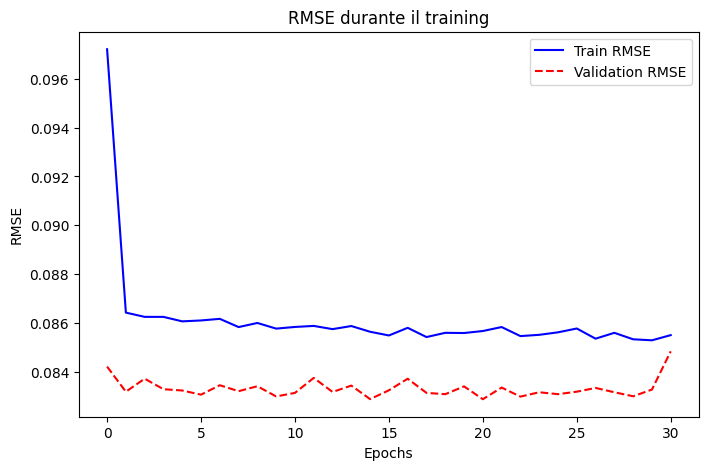

Grafico RMSE salvato in lstm_test_5/rmse_plot.png


In [ ]:
lstm_model.plot_training_history()

In [ ]:
lstm_model.evaluate(X_test, y_test)

Metriche salvate in lstm_test_5/evaluation_metrics.csv


{'MSE': 0.006980238204339406,
 'RMSE': 0.08354781986586728,
 'MAE': 0.06381006581335262,
 'R2': 0.5579860977527966}

In [ ]:
y_pred = lstm_model.predict(X_test)  
comparison_df = lstm_model.compare_predictions(y_test, y_pred)  

Confronto predizioni salvato in lstm_test_5/predictions_comparison.csv


In [ ]:
lstm_model.plot_predictions(y_test, y_pred, 50)

Grafico salvato in lstm_test_5/predictions_plot_1.png
Grafico salvato in lstm_test_5/predictions_plot_2.png
Grafico salvato in lstm_test_5/predictions_plot_tot.png


In [ ]:
lstm_model.save_model()

Modello salvato in lstm_test_5/lstm_model.h5


In [ ]:
lstm_model.save_summary()

Sommario del modello salvato in lstm_test_5/model_summary.txt


In [ ]:
lstm_model.save_training_history()

Training history salvata in lstm_test_5/training_history.npy
